In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from Bio import SeqIO
from local_settings import BASE_PATH

In [2]:
GENOME_PATH = BASE_PATH / "data/hg002-ont-1p.fa"
motifs = ['TTAGGG', 'CCCTAA']

#### Extract "Perfect" telomere length by summing canonical 6-mer (TTAGGG/CCCTAA) occurrences.

In [3]:
results = []
perfect_len = 0
for record in SeqIO.parse(GENOME_PATH, "fasta"):
    seq_str = str(record.seq).upper()
    # Perfect count * 6bp
    perfect_len = (seq_str.count('TTAGGG') + seq_str.count('CCCTAA')) * 6
    results.append(perfect_len)

#### Compute and visualize "Perfect" 1p telomere lengths via direct canonical hexamer counting.

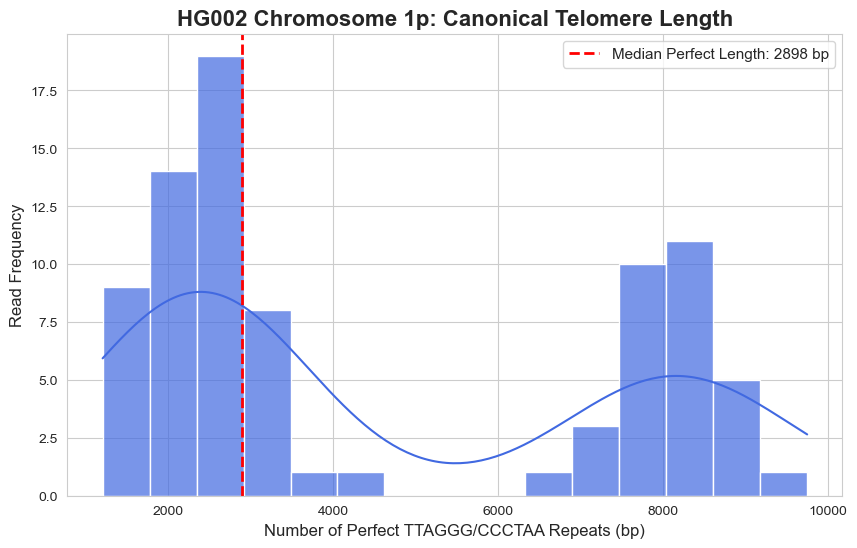

Graph generated. Median Perfect Length: 2898.0 bp across 83 reads.


In [4]:
plt.figure(figsize=(10, 6))
sns.set_style("whitegrid")

# Create the histogram + KDE
ax = sns.histplot(results, kde=True, color="royalblue", bins=15, alpha=0.7)

# Add Median line and text
median_val = np.median(results)
plt.axvline(median_val, color='red', linestyle='--', linewidth=2, 
            label=f'Median Perfect Length: {median_val:.0f} bp')

plt.title("HG002 Chromosome 1p: Canonical Telomere Length", fontsize=16, fontweight='bold')
plt.xlabel("Number of Perfect TTAGGG/CCCTAA Repeats (bp)", fontsize=12)
plt.ylabel("Read Frequency", fontsize=12)
plt.legend(frameon=True, fontsize=11)

#plt.tight_layout()
plt.show()

print(f"Graph generated. Median Perfect Length: {median_val} bp across {len(results)} reads.")